![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/nahue/Searches/Escritorio/CARRERA HENRY/M6/Proyecto Integrador/BBDD_Hospitalización.csv", delimiter = ';')

In [3]:
df.head()

EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES  PSA BIOPSIAS PREVIAS  \
0  53.0       NO                         NO    4               NO   
1  56.0       NO                         NO  7,7               NO   
2  57.0       NO                         NO   29               SI   
3  56.0       NO                         NO    7               NO   
4  55.0       NO                         NO   29               SI   

  VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
1                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
2                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
3                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
4                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   

   NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  \
0                        12.0  NO                                NO     NEG   
1                        12.0  NO                                NO     NEG   
2                        24.0  NO                                NO     NEG   
3                        12.0  NO                                NO     NEG   
4                        24.0  NO                                NO     NEG   

  NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
0                                                  1                          
1                                                  1                          
2                                                  1                          
3                                                  1                          
4                                                  1                          

  FIEBRE ITU TIPO DE CULTIVO AGENTE AISLADO  \
0     SI  NO              NO             NO   
1     SI  NO              NO             NO   
2     SI  NO     HEMOCULTIVO         E.COLI   
3     SI  NO              NO             NO   
4     SI  NO     HEMOCULTIVO         E.COLI   

                  PATRON DE RESISTENCIA HOSPITALIZACION  \
0                                    NO              SI   
1                                    NO              SI   
2   AMPI R, CIPRO R, GENTA R, SULFA M R              SI   
3                                    NO              SI   
4                                    NO              SI   

   DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
0                      2.0                       0.0  
1                      5.0                       0.0  
2                      4.0                       3.0  
3                      5.0                       0.0  
4                      4.0                       3.0

In [4]:
df.shape

(570, 20)

In [5]:
print(df.isnull().sum())  # Contar valores nulos por columna

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

In [6]:
df = df.dropna() #Los datos nulos son menor al 5% y en todas las columnas categoricas los datos estan bastante desbalanceados por lo que 
#la falta de estos no inferiran en el estudio de los mismos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 564
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       541 non-null    float64
 1   DIABETES                                                                   541 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 541 non-null    object 
 3   PSA                                                                        541 non-null    object 
 4   BIOPSIAS PREVIAS                                                           541 non-null    object 
 5   VOLUMEN PROSTATICO                                                         541 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

In [8]:
# convertir a integer las variables EDAD, NUMERO DE MUESTRAS TOMADAS, NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN 
# INFECCIOSA, DIAS HOSPITALIZACION MQ, DIAS HOSPITALIZACIÓN UPC 
df['EDAD'] = df['EDAD'].apply(np.int64)
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].apply(np.int64)
#df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].apply(np.int64)
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].apply(np.int64)
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].apply(np.int64)

In [9]:
# dio error en 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
# algunos son NO, reemplazo por 0
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].unique()

array(['1', '2', '3', '5', '9', 'NO'], dtype=object)

In [11]:
#reemplazo NO por 0
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0)

In [12]:
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].apply(np.int64)

In [13]:
#La columna NUMERO DE DIAS POST... tiene datos tipo object cuando deberiasn ser int
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].apply(np.int64)

In [14]:
##La columna PSA tiene datos tipo object cuando deberian ser float

#df['PSA'] = df['PSA'].astype(float) #me da error porque hay valores con ','. 

# Reemplo comas por puntos porque así lo requiere python para que los pueda leer como decimales.
df['PSA'] = df['PSA'].str.replace(',', '.')

#Ahora sí convierto a float
df['PSA'] = df['PSA'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 564
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       541 non-null    int64  
 1   DIABETES                                                                   541 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 541 non-null    object 
 3   PSA                                                                        541 non-null    float64
 4   BIOPSIAS PREVIAS                                                           541 non-null    object 
 5   VOLUMEN PROSTATICO                                                         541 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

In [16]:
df.describe()

EDAD         PSA  NUMERO DE MUESTRAS TOMADAS  \
count  541.000000  541.000000                  541.000000   
mean    63.879852   13.391257                   12.987061   
std      9.389434   15.946475                    3.942858   
min     39.000000    0.600000                    4.000000   
25%     59.000000    5.600000                   12.000000   
50%     64.000000    8.000000                   12.000000   
75%     69.000000   15.000000                   12.000000   
max    151.000000  100.000000                   24.000000   

       NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
count                                         541.000000                           
mean                                            0.134935                           
std                                             0.759080                           
min                                             0.000000                           
25%                                             0.000000                           
50%                                             0.000000                           
75%                                             0.000000                           
max                                             9.000000                           

       DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
count               541.000000                541.000000  
mean                  0.168207                  0.014787  
std                   0.973437                  0.201300  
min                   0.000000                  0.000000  
25%                   0.000000                  0.000000  
50%                   0.000000                  0.000000  
75%                   0.000000                  0.000000  
max                  12.000000                  3.000000

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

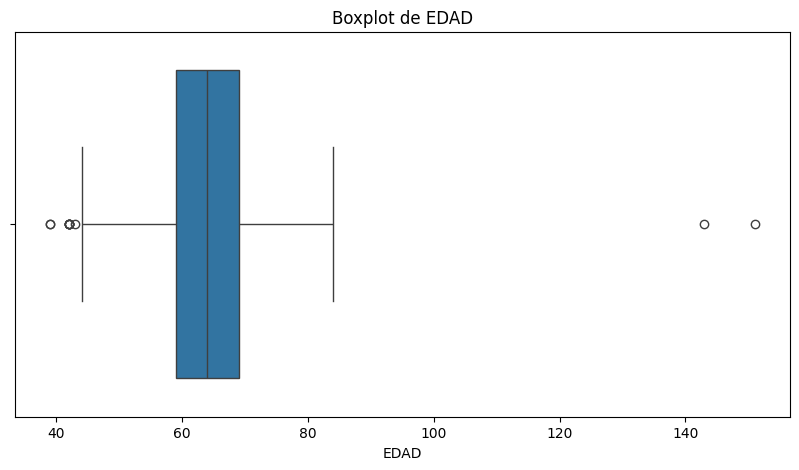

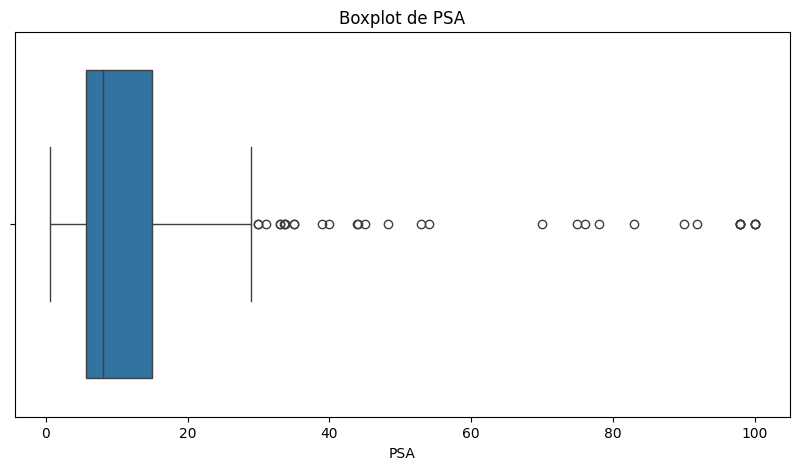

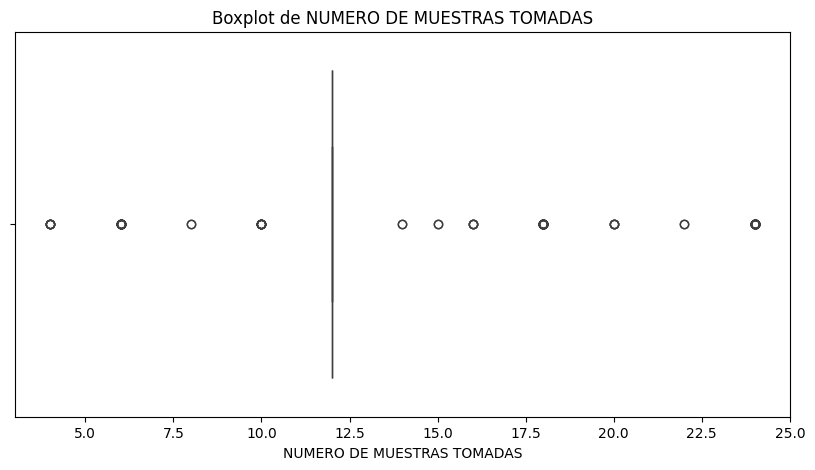

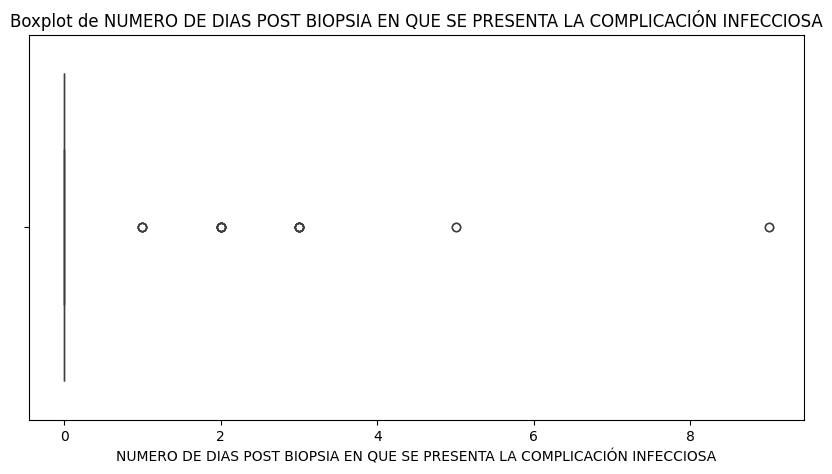

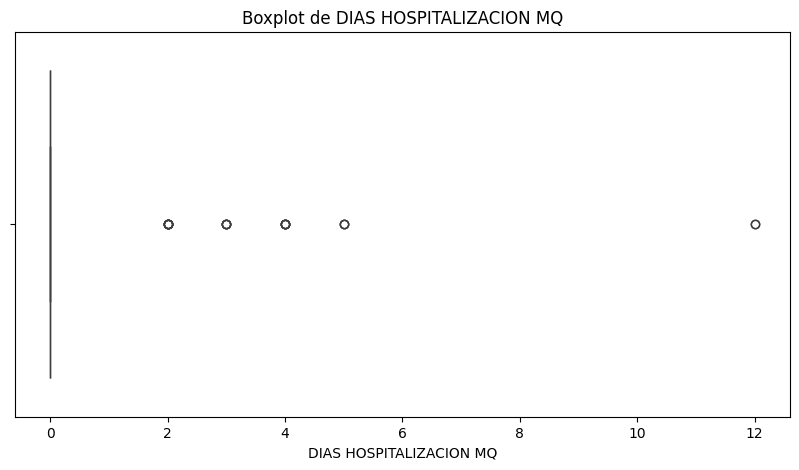

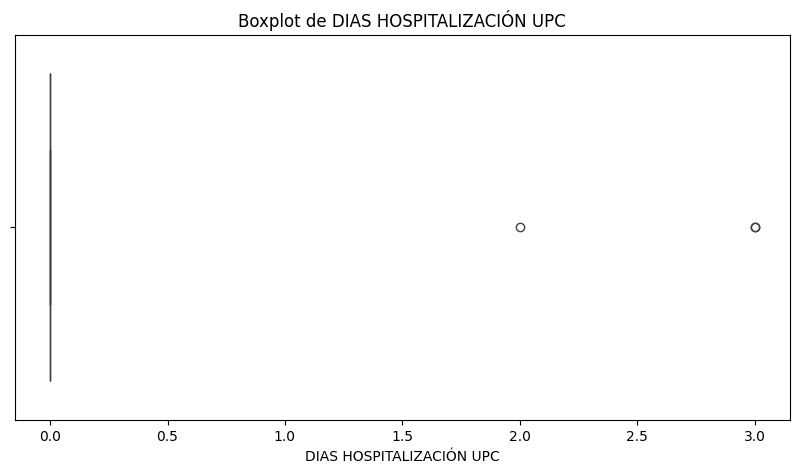

In [31]:
import scipy.stats as stats

#Seleccionamos sólo las columnas numéricas 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols: 
    plt.figure(figsize=(10, 5)) 
    sns.boxplot(x=df[col].dropna()) 
    plt.title(f'Boxplot de {col}') 
    plt.xlabel(col) 
    plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [17]:
#Por lo visto en el boxplot de la columna Edad hay dos valores erroneos:
df[df['EDAD'] > 140]

EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES  PSA BIOPSIAS PREVIAS  \
161   143       SI                         NO  6.8               NO   
181   151       NO                         NO  5.7               NO   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
161                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
181                 SI                                   OTROS   

     NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  \
161                          12  NO                                NO     NEG   
181                          12  NO                                NO     NEG   

     NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
161                                                  0                           
181                                                  0                           

    FIEBRE ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA  \
161     NO  NO              NO             NO                    NO   
181     NO  NO              NO             NO                    NO   

    HOSPITALIZACION  DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
161              NO                        0                         0  
181              NO                        0                         0

In [18]:
#Supongo que ambos fueron error de tipeo y les saco el 1 de adelante
df.iloc[181, df.columns.get_loc('EDAD')] = 51
df.iloc[161, df.columns.get_loc('EDAD')] = 43

In [19]:
#Por lo que pude investigar, el valor normal de PSA en sangre es 4ng/ml y que valores entre 6.5 y 10 son graves según la edad.
#Aunque pueden haber valores mayores, es muy poco frecuente que eso suceda.
#df[df['PSA'] > 10]
#Por lo visto hay mas de 208 valores > a 10. En un DB de 568 filas considero extremadamente raro tal cantidad. 
#Según el boxplot, los outliers serían a partir de un valor de 30 y hay 32 datos. Como el resto de las columnas (sobretodo las categóricas) 
#de esos outliers poseen los valores que mas se repiten decido eliminar las 32 filas.
df[df['PSA'] > 30]

EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES    PSA BIOPSIAS PREVIAS  \
27     77       NO                         NO   91.8               NO   
29     77       NO                         NO   98.0               NO   
34     53       NO                         NO   90.0               NO   
40     53       NO                         NO  100.0               NO   
46     84       NO                         NO   38.9               NO   
48     84       NO                         NO   40.0               NO   
56     42       NO                         NO   53.0               NO   
77     54       NO                         NO   98.0               NO   
111    68       NO                         NO   98.0               NO   
114    64       NO                         NO  100.0               NO   
154    66       NO                         NO   33.6               NO   
157    69       NO                         NO   48.3               NO   
171    69       NO                         NO   31.0               NO   
175    69       NO                         NO   83.0               NO   
202    73       NO                         NO   33.8               NO   
219    79       SI                         NO   43.9               NO   
270    51       NO                         NO   33.0               NO   
274    80       NO                         NO   76.0               NO   
304    75       NO                         NO   70.0               NO   
310    42       NO                         NO   54.0               NO   
331    54       NO                         NO  100.0               NO   
366    67       NO                         NO  100.0               NO   
369    64       NO                         NO   98.0               NO   
409    66       NO                         NO   33.8               NO   
412    69       NO                         NO   45.0               NO   
428    68       NO                         NO   35.0               NO   
432    69       NO                         NO   98.0               NO   
459    73       NO                         NO   33.0               NO   
476    79       NO                         NO   44.0               NO   
527    50       NO                         NO   35.0               NO   
531    84       NO                         NO   78.0               NO   
561    75       NO                         NO   75.0               NO   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
27                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
29                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
34                  SI            CEFALOSPORINA_AMINOGLUCOCIDO   
40                  SI            CEFALOSPORINA_AMINOGLUCOCIDO   
46                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
48                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
56                  NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
77                  SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
111                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
114                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
154                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
157                 SI                                   OTROS   
171                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
175                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
202                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
219                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
270                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
274                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
304                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
310                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   
331                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
366                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
369                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
409        

In [20]:
df = df[df['PSA'] <= 30] #Elimino valores de PSA mayores a 30.

In [22]:
conteos = df['NUMERO DE MUESTRAS TOMADAS'].value_counts()
print(conteos)

NUMERO DE MUESTRAS TOMADAS
12    395
24     41
18     35
6      13
10      8
4       4
16      3
8       2
15      2
22      2
14      2
20      2
Name: count, dtype: int64


In [23]:
conteos2 = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()
print(conteos2)

ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          495
SI           10
SI, ASMA      3
SI, EPOC      1
Name: count, dtype: int64


In [21]:
#En la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA' los valores son 'SI' o 'NO' pero hay 3 valores 'SI, EPOC' y 1 valor 'SI, ASMA'. Los unifico con los 'SI'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC', 'SI')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA', 'SI')

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [22]:
df.describe(include=['O'])

DIABETES HOSPITALIZACIÓN ULTIMO MES BIOPSIAS PREVIAS  \
count       509                        509              509   
unique        2                          2                2   
top          NO                         NO               NO   
freq        447                        504              457   

       VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  CUP  \
count                 509                                     509  509   
unique                  2                                       5    2   
top                    SI          FLUOROQUINOLONA_AMINOGLICOSIDO   NO   
freq                  365                                     398  507   

       ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA FIEBRE  ITU TIPO DE CULTIVO  \
count                                509     509    509  509             509   
unique                                 2      10      2    2               4   
top                                   NO     NEG     NO   NO              NO   
freq                                 495     304    473  503             501   

       AGENTE AISLADO PATRON DE RESISTENCIA HOSPITALIZACION  
count             509                   509             509  
unique              3                     5               2  
top                NO                    NO              NO  
freq              501                   502             486

In [26]:
conteos3 = df['BIOPSIA'].value_counts()
print(conteos3)

BIOPSIA
NEG                                           304
ADENOCARCINOMA GLEASON 7                       92
ADENOCARCINOMA GLEASON 6                       38
ADENOCARCINOMA GLEASON 6                       14
PROSTATITIS                                    14
ADENOCARCINOMA GLEASON 9                       14
HIPERPLASIA PROSTATICA                         13
ADENOCARCINOMA GLEASON 8                        9
ADENOCARCINOMA GLEASON 7                        9
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: count, dtype: int64


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [30]:
#Lo hice antes porque no podía realizar cambio de tipo de datos

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [50]:
#Normalizaremos a fin de ajustar los valores en una escala común ya que, por ejemplo, edad y PSA tienen distintos rangos y tipos de datos

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#df['EDAD_normalizada'] = scaler.fit_transform(df[['EDAD']])
#df['PSA_normalizada'] = scaler.fit_transform(df[['PSA']])
#df['NUMERO DE MUESTRAS TOMADAS_normalizada'] = scaler.fit_transform(df[['NUMERO DE MUESTRAS TOMADAS']])
#df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA_normalizada'] = scaler.fit_transform(df[['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']])
#df['DIAS HOSPITALIZACION MQ_normalizada'] = scaler.fit_transform(df[['DIAS HOSPITALIZACION MQ']])
#df['DIAS HOSPITALIZACIÓN UPC_normalizada'] = scaler.fit_transform(df[['DIAS HOSPITALIZACIÓN UPC']])

'''ME APARECE ESTA SUGERENCIA:
C:\Users\nahue\AppData\Local\Temp\ipykernel_19284\1514489105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDAD_normalizada'] = scaler.fit_transform(df[['EDAD']])'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 30-31: truncated \UXXXXXXXX escape (3340733617.py, line 19)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalizar las columnas usando .loc para evitar el SettingWithCopyWarning
df.loc[:, 'EDAD_norm'] = scaler.fit_transform(df[['EDAD']])
df.loc[:, 'PSA_norm'] = scaler.fit_transform(df[['PSA']])
df.loc[:, 'NUMERO_DE_MUESTRAS_TOMADAS_norm'] = scaler.fit_transform(df[['NUMERO DE MUESTRAS TOMADAS']])
df.loc[:, 'NUMERO_DE_DIAS_POST_BIOPSIA_norm'] = scaler.fit_transform(df[['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']])
df.loc[:, 'DIAS_HOSPITALIZACION_MQ_norm'] = scaler.fit_transform(df[['DIAS HOSPITALIZACION MQ']])
df.loc[:, 'DIAS_HOSPITALIZACION_UPC_norm'] = scaler.fit_transform(df[['DIAS HOSPITALIZACIÓN UPC']])

df.head()


EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES   PSA BIOPSIAS PREVIAS  \
0    53       NO                         NO   4.0               NO   
1    56       NO                         NO   7.7               NO   
2    57       NO                         NO  29.0               SI   
3    56       NO                         NO   7.0               NO   
4    55       NO                         NO  29.0               SI   

  VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
0                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
1                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
2                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
3                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   
4                 SI          FLUOROQUINOLONA_AMINOGLICOSIDO   

   NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA  ...  \
0                          12  NO                                NO  ...   
1                          12  NO                                NO  ...   
2                          24  NO                                NO  ...   
3                          12  NO                                NO  ...   
4                          24  NO                                NO  ...   

                  PATRON DE RESISTENCIA  HOSPITALIZACION  \
0                                    NO               SI   
1                                    NO               SI   
2   AMPI R, CIPRO R, GENTA R, SULFA M R               SI   
3                                    NO               SI   
4                                    NO               SI   

  DIAS HOSPITALIZACION MQ DIAS HOSPITALIZACIÓN UPC EDAD_norm  PSA_norm  \
0                       2                        0 -1.145870 -0.927426   
1                       5                        0 -0.820639 -0.367534   
2                       4                        3 -0.712229  2.855627   
3                       5                        0 -0.820639 -0.473460   
4                       4                        3 -0.929049  2.855627   

  NUMERO_DE_MUESTRAS_TOMADAS_norm NUMERO_DE_DIAS_POST_BIOPSIA_norm  \
0                       -0.318613                         1.096669   
1                       -0.318613                         1.096669   
2                        2.790152                         1.096669   
3                       -0.318613                         1.096669   
4                        2.790152                         1.096669   

   DIAS_HOSPITALIZACION_MQ_norm  DIAS_HOSPITALIZACION_UPC_norm  
0                      1.818129                      -0.075817  
1                      4.813042                      -0.075817  
2                      3.814738                      14.395679  
3                      4.813042                      -0.075817  
4                      3.814738                      14.395679  

[5 rows x 26 columns]

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [24]:
df_norm = df.drop(columns=['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS','DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'])
df_norm.head()

DIABETES HOSPITALIZACIÓN ULTIMO MES BIOPSIAS PREVIAS VOLUMEN PROSTATICO  \
0       NO                         NO               NO                 SI   
1       NO                         NO               NO                 SI   
2       NO                         NO               SI                 SI   
3       NO                         NO               NO                 SI   
4       NO                         NO               SI                 SI   

  ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS CUP  \
0          FLUOROQUINOLONA_AMINOGLICOSIDO  NO   
1          FLUOROQUINOLONA_AMINOGLICOSIDO  NO   
2          FLUOROQUINOLONA_AMINOGLICOSIDO  NO   
3          FLUOROQUINOLONA_AMINOGLICOSIDO  NO   
4          FLUOROQUINOLONA_AMINOGLICOSIDO  NO   

  ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA FIEBRE ITU TIPO DE CULTIVO  \
0                                NO     NEG     SI  NO              NO   
1                                NO     NEG     SI  NO              NO   
2                                NO     NEG     SI  NO     HEMOCULTIVO   
3                                NO     NEG     SI  NO              NO   
4                                NO     NEG     SI  NO     HEMOCULTIVO   

  AGENTE AISLADO                 PATRON DE RESISTENCIA HOSPITALIZACION  \
0             NO                                    NO              SI   
1             NO                                    NO              SI   
2         E.COLI   AMPI R, CIPRO R, GENTA R, SULFA M R              SI   
3             NO                                    NO              SI   
4         E.COLI                                    NO              SI   

   EDAD_norm  PSA_norm  NUMERO_DE_MUESTRAS_TOMADAS_norm  \
0  -1.145870 -0.927426                        -0.318613   
1  -0.820639 -0.367534                        -0.318613   
2  -0.712229  2.855627                         2.790152   
3  -0.820639 -0.473460                        -0.318613   
4  -0.929049  2.855627                         2.790152   

   NUMERO_DE_DIAS_POST_BIOPSIA_norm  DIAS_HOSPITALIZACION_MQ_norm  \
0                          1.096669                      1.818129   
1                          1.096669                      4.813042   
2                          1.096669                      3.814738   
3                          1.096669                      4.813042   
4                          1.096669                      3.814738   

   DIAS_HOSPITALIZACION_UPC_norm  
0                      -0.075817  
1                      -0.075817  
2                      14.395679  
3                      -0.075817  
4                      14.395679

In [127]:
conteos6 = df_norm['AGENTE AISLADO'].value_counts()
print(conteos6)

AGENTE AISLADO
NO                        501
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64


In [128]:
conteos4 = df_norm['TIPO DE CULTIVO'].value_counts()
print(conteos4)

TIPO DE CULTIVO
NO                          501
UROCULTIVO                    4
HEMOCULTIVO                   2
HEMOCULTIVO Y UROCULTIVO      2
Name: count, dtype: int64


In [109]:
conteos5 = df_norm['PATRON DE RESISTENCIA'].value_counts()
print(conteos5)

PATRON DE RESISTENCIA
NO                                                                                 502
RESISTENTE A AMPI, CIPRO Y GENTA                                                     2
RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA      2
MULTI SENSIBLE                                                                       2
 AMPI R, CIPRO R, GENTA R, SULFA M R                                                 1
Name: count, dtype: int64


In [110]:
conteos7 = df_norm['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()
print(conteos7)

ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    398
CEFALOSPORINA_AMINOGLUCOCIDO       53
OTROS                              39
OROQUINOLONAS                      17
FLUOROQUINOLONA_AMINOGLICÓSIDO      2
Name: count, dtype: int64


In [25]:
df_norm['DIABETES'] = df_norm['DIABETES'].map({'SI':1 ,'NO':0})
df_norm['HOSPITALIZACIÓN ULTIMO MES'] = df_norm['HOSPITALIZACIÓN ULTIMO MES'].map({'SI':1 ,'NO':0}) 
df_norm['VOLUMEN PROSTATICO'] = df_norm['VOLUMEN PROSTATICO'].map({'SI':1 ,'NO':0}) 
df_norm['BIOPSIAS PREVIAS'] = df_norm['BIOPSIAS PREVIAS'].map({'SI':1 ,'NO':0}) 
df_norm['CUP'] = df_norm['CUP'].map({'SI':1 ,'NO':0}) 
df_norm['FIEBRE'] = df_norm['FIEBRE'].map({'SI':1 ,'NO':0}) 
df_norm['ITU'] = df_norm['ITU'].map({'SI':1 ,'NO':0}) 
df_norm['HOSPITALIZACION'] = df_norm['HOSPITALIZACION'].map({'SI':1 ,'NO':0}) 
df_norm['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df_norm['ENF. CRONICA PULMONAR OBSTRUCTIVA'].map({'SI':1 ,'NO':0}) 

In [26]:
#Uso one hot coding para las columnas con mas de una variable de tipo string:
df_norm = pd.get_dummies(df_norm, columns=['PATRON DE RESISTENCIA','TIPO DE CULTIVO','AGENTE AISLADO','ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'BIOPSIA'], prefix=['Patron de Resistencia','Tipo de Cultivo', 'Agente Aislado', 'Antibiotico', 'Biopsia'])

In [27]:
df_norm.select_dtypes(include=['bool'])

Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R  \
0                                                False            
1                                                False            
2                                                 True            
3                                                False            
4                                                False            
..                                                 ...            
559                                              False            
560                                              False            
562                                              False            
563                                              False            
564                                              False            

     Patron de Resistencia_MULTI SENSIBLE  Patron de Resistencia_NO  \
0                                   False                      True   
1                                   False                      True   
2                                   False                     False   
3                                   False                      True   
4                                   False                      True   
..                                    ...                       ...   
559                                 False                      True   
560                                 False                      True   
562                                 False                      True   
563                                 False                      True   
564                                 False                      True   

     Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA  \
0                                                False        
1                                                False        
2                                                False        
3                                                False        
4                                                False        
..                                                 ...        
559                                              False        
560                                              False        
562                                              False        
563                                              False        
564                                              False        

     Patron de Resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA  \
0                                                False                                                       
1                                                False                                                       
2                                                False                                                       
3                                                False                                                       
4                                                False                                                       
..                                                 ...                                                       
559                                              False                                                       
560                                              False                                                       
562                                              False                                                       
563                                              False                                                       
564                                              False                                                       

     Tipo de Cultivo_HEMOCULTIVO  Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO  \
0                          False                                     False   
1                          False                                     False   
2                           True   

In [28]:
df_norm.columns

Index(['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS',
       'VOLUMEN PROSTATICO', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
       'FIEBRE', 'ITU', 'HOSPITALIZACION', 'EDAD_norm', 'PSA_norm',
       'NUMERO_DE_MUESTRAS_TOMADAS_norm', 'NUMERO_DE_DIAS_POST_BIOPSIA_norm',
       'DIAS_HOSPITALIZACION_MQ_norm', 'DIAS_HOSPITALIZACION_UPC_norm',
       'Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R',
       'Patron de Resistencia_MULTI SENSIBLE', 'Patron de Resistencia_NO',
       'Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA',
       'Patron de Resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
       'Tipo de Cultivo_HEMOCULTIVO',
       'Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO', 'Tipo de Cultivo_NO',
       'Tipo de Cultivo_UROCULTIVO', 'Agente Aislado_E.COLI',
       'Agente Aislado_NO', 'Agente Aislado_PSEUDOMONAS AERUGINOSA',
       'Antibiotico_CEFALOSPORINA_AMINOGLUCOCIDO',
       'Antibiotico_FLUORO

In [29]:
columnas_booleanas = ['Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R',                                 
'Patron de Resistencia_MULTI SENSIBLE',
'Patron de Resistencia_NO',
'Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA',
'Patron de Resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
'Tipo de Cultivo_HEMOCULTIVO',
'Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO',
'Tipo de Cultivo_NO',
'Tipo de Cultivo_UROCULTIVO',
'Agente Aislado_E.COLI',
'Agente Aislado_NO',
'Agente Aislado_PSEUDOMONAS AERUGINOSA', 
'Antibiotico_FLUOROQUINOLONA_AMINOGLICOSIDO',
'Antibiotico_FLUOROQUINOLONA_AMINOGLICÓSIDO',
'Antibiotico_OROQUINOLONAS',
'Antibiotico_OTROS', 'Antibiotico_CEFALOSPORINA_AMINOGLUCOCIDO',
'Biopsia_ADENOCARCINOMA GLEASON 6',
'Biopsia_ADENOCARCINOMA GLEASON 6',
'Biopsia_ADENOCARCINOMA GLEASON 7',
'Biopsia_ADENOCARCINOMA GLEASON 7', 'Biopsia_ADENOCARCINOMA GLEASON 8 ',
'Biopsia_ADENOCARCINOMA GLEASON 9 ',
'Biopsia_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS',
'Biopsia_HIPERPLASIA PROSTATICA',
'Biopsia_NEG',
'Biopsia_PROSTATITIS']

for columna in columnas_booleanas: df_norm.loc[:, columna] = df_norm[columna].astype(int)

C:\Users\nahue\AppData\Local\Temp\ipykernel_21924\20901040.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

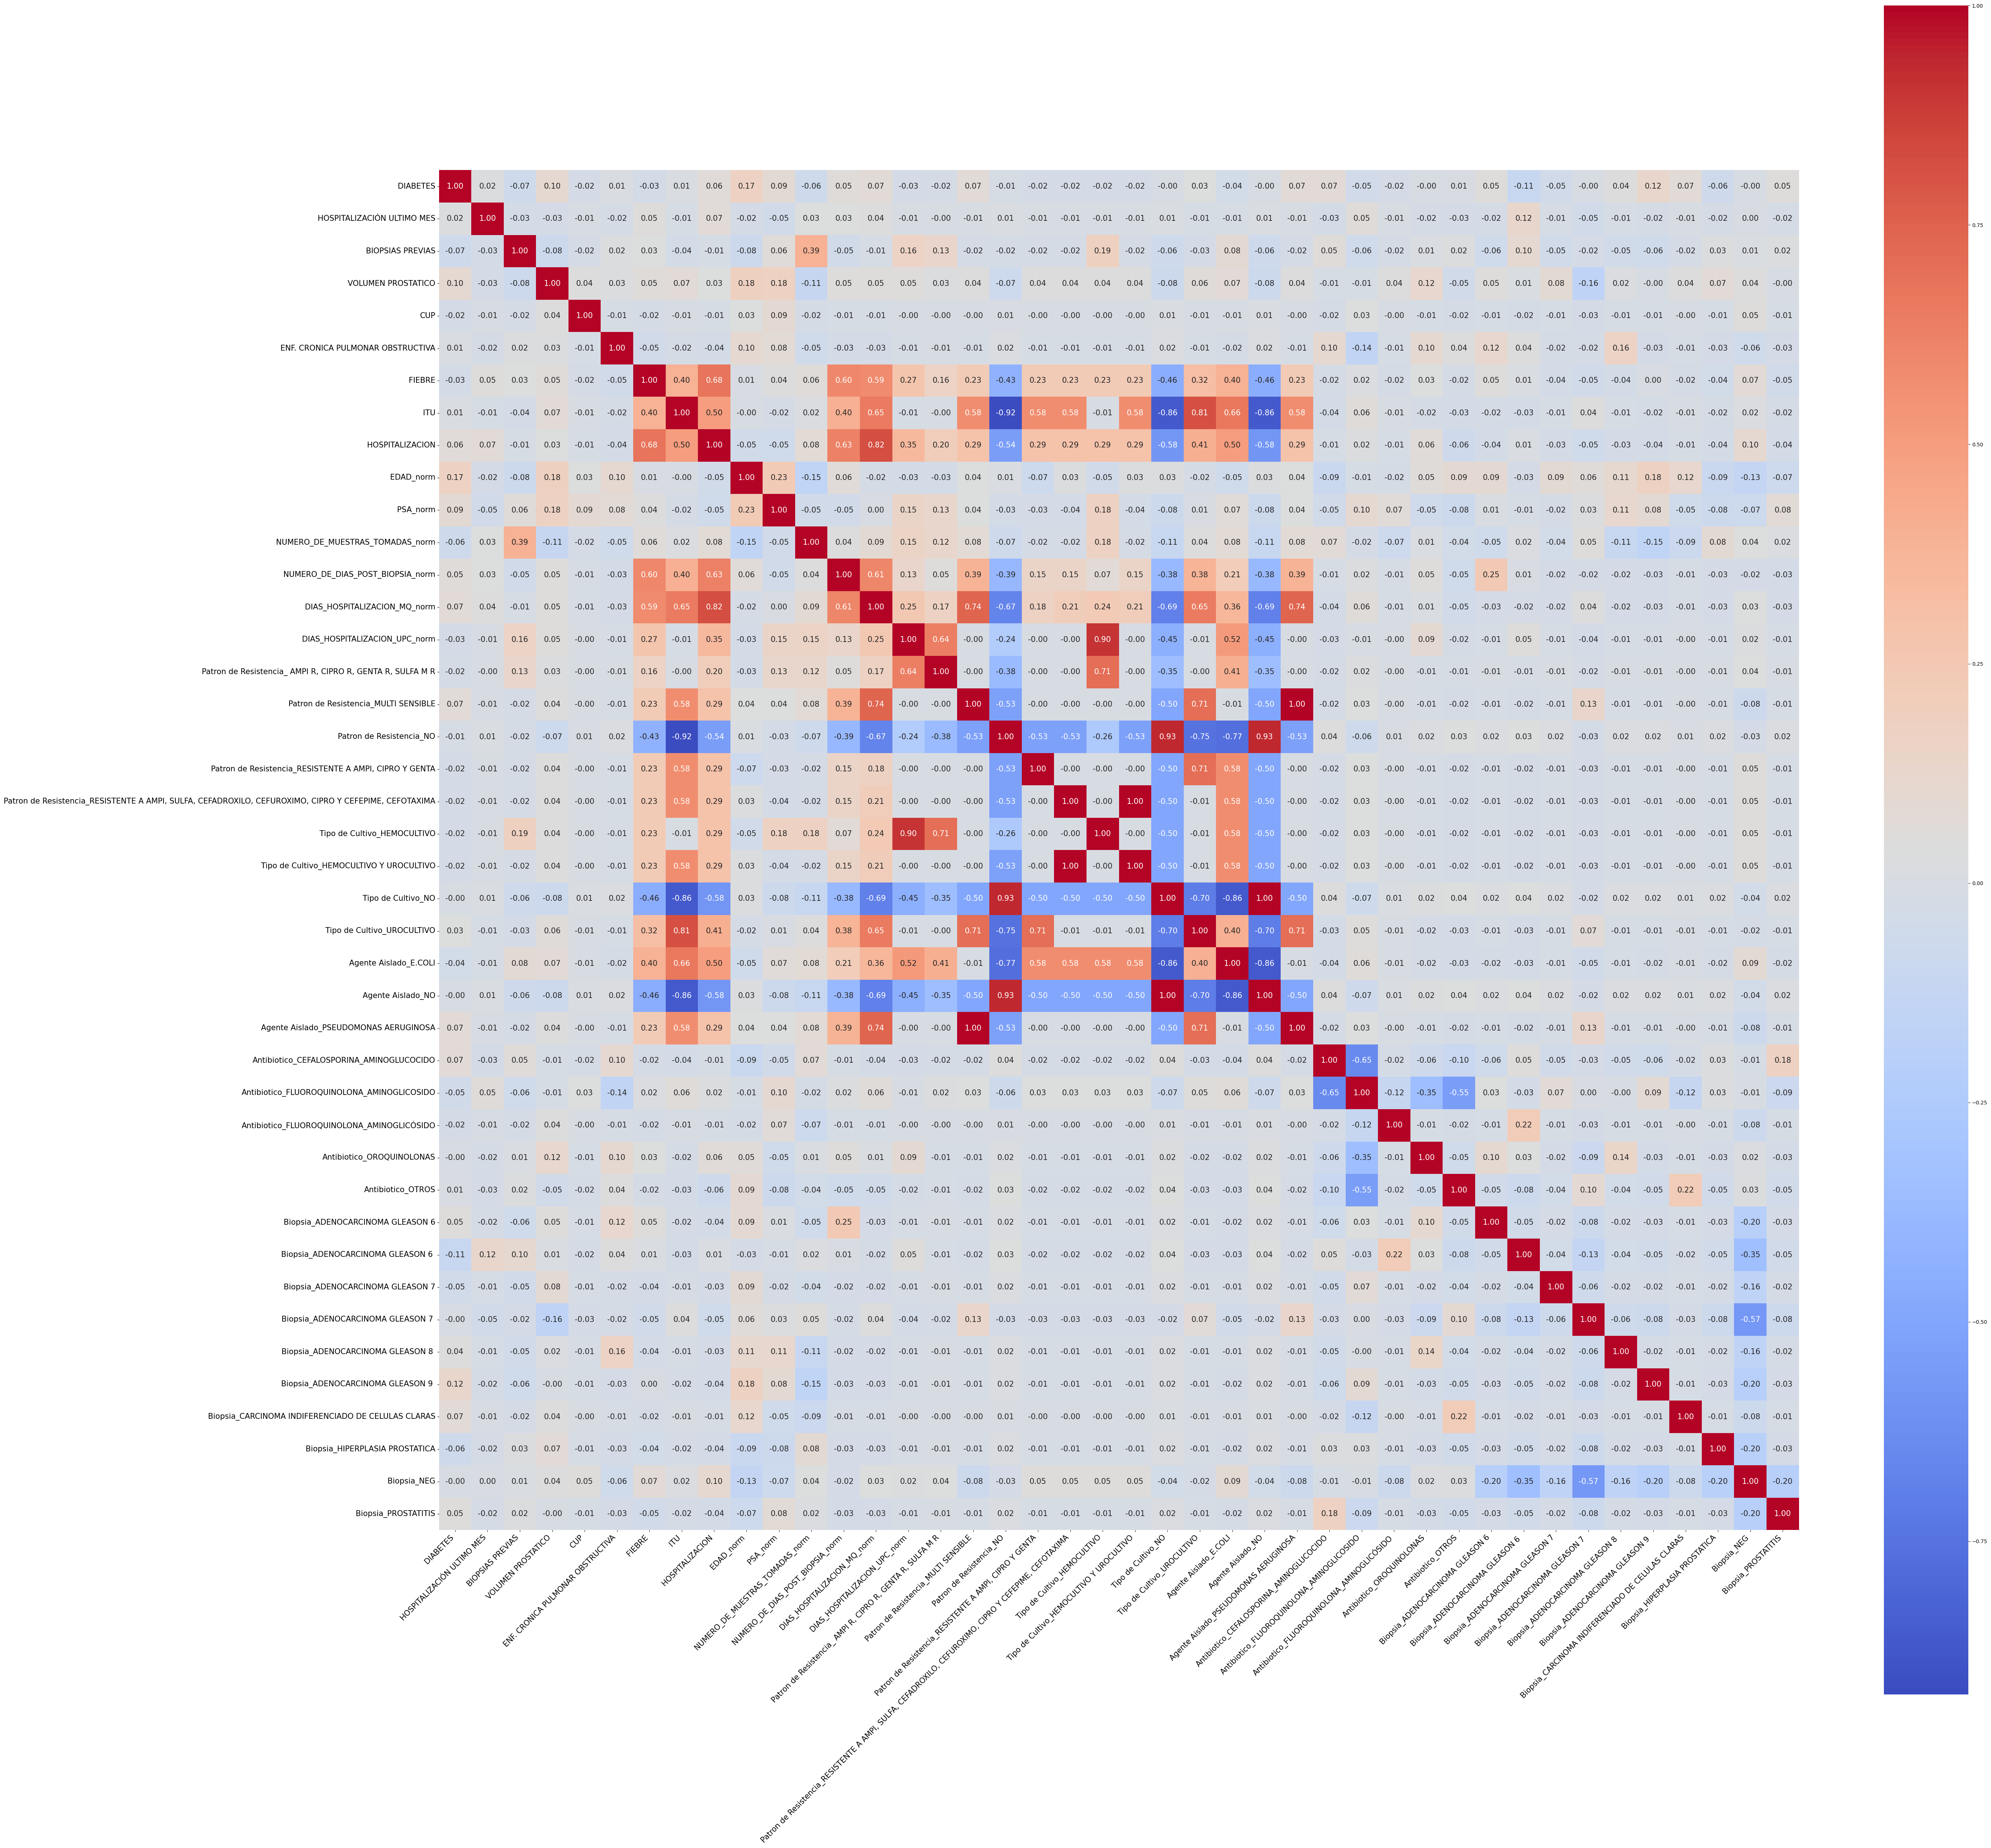

In [30]:

fig = plt.figure(figsize= (60,60))
sns.heatmap(df_norm.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=15) # Ajustar el tamaño de las etiquetas del eje x
plt.yticks(rotation=0, fontsize=15) # Ajustar el tamaño de las etiquetas del eje y
plt.show()

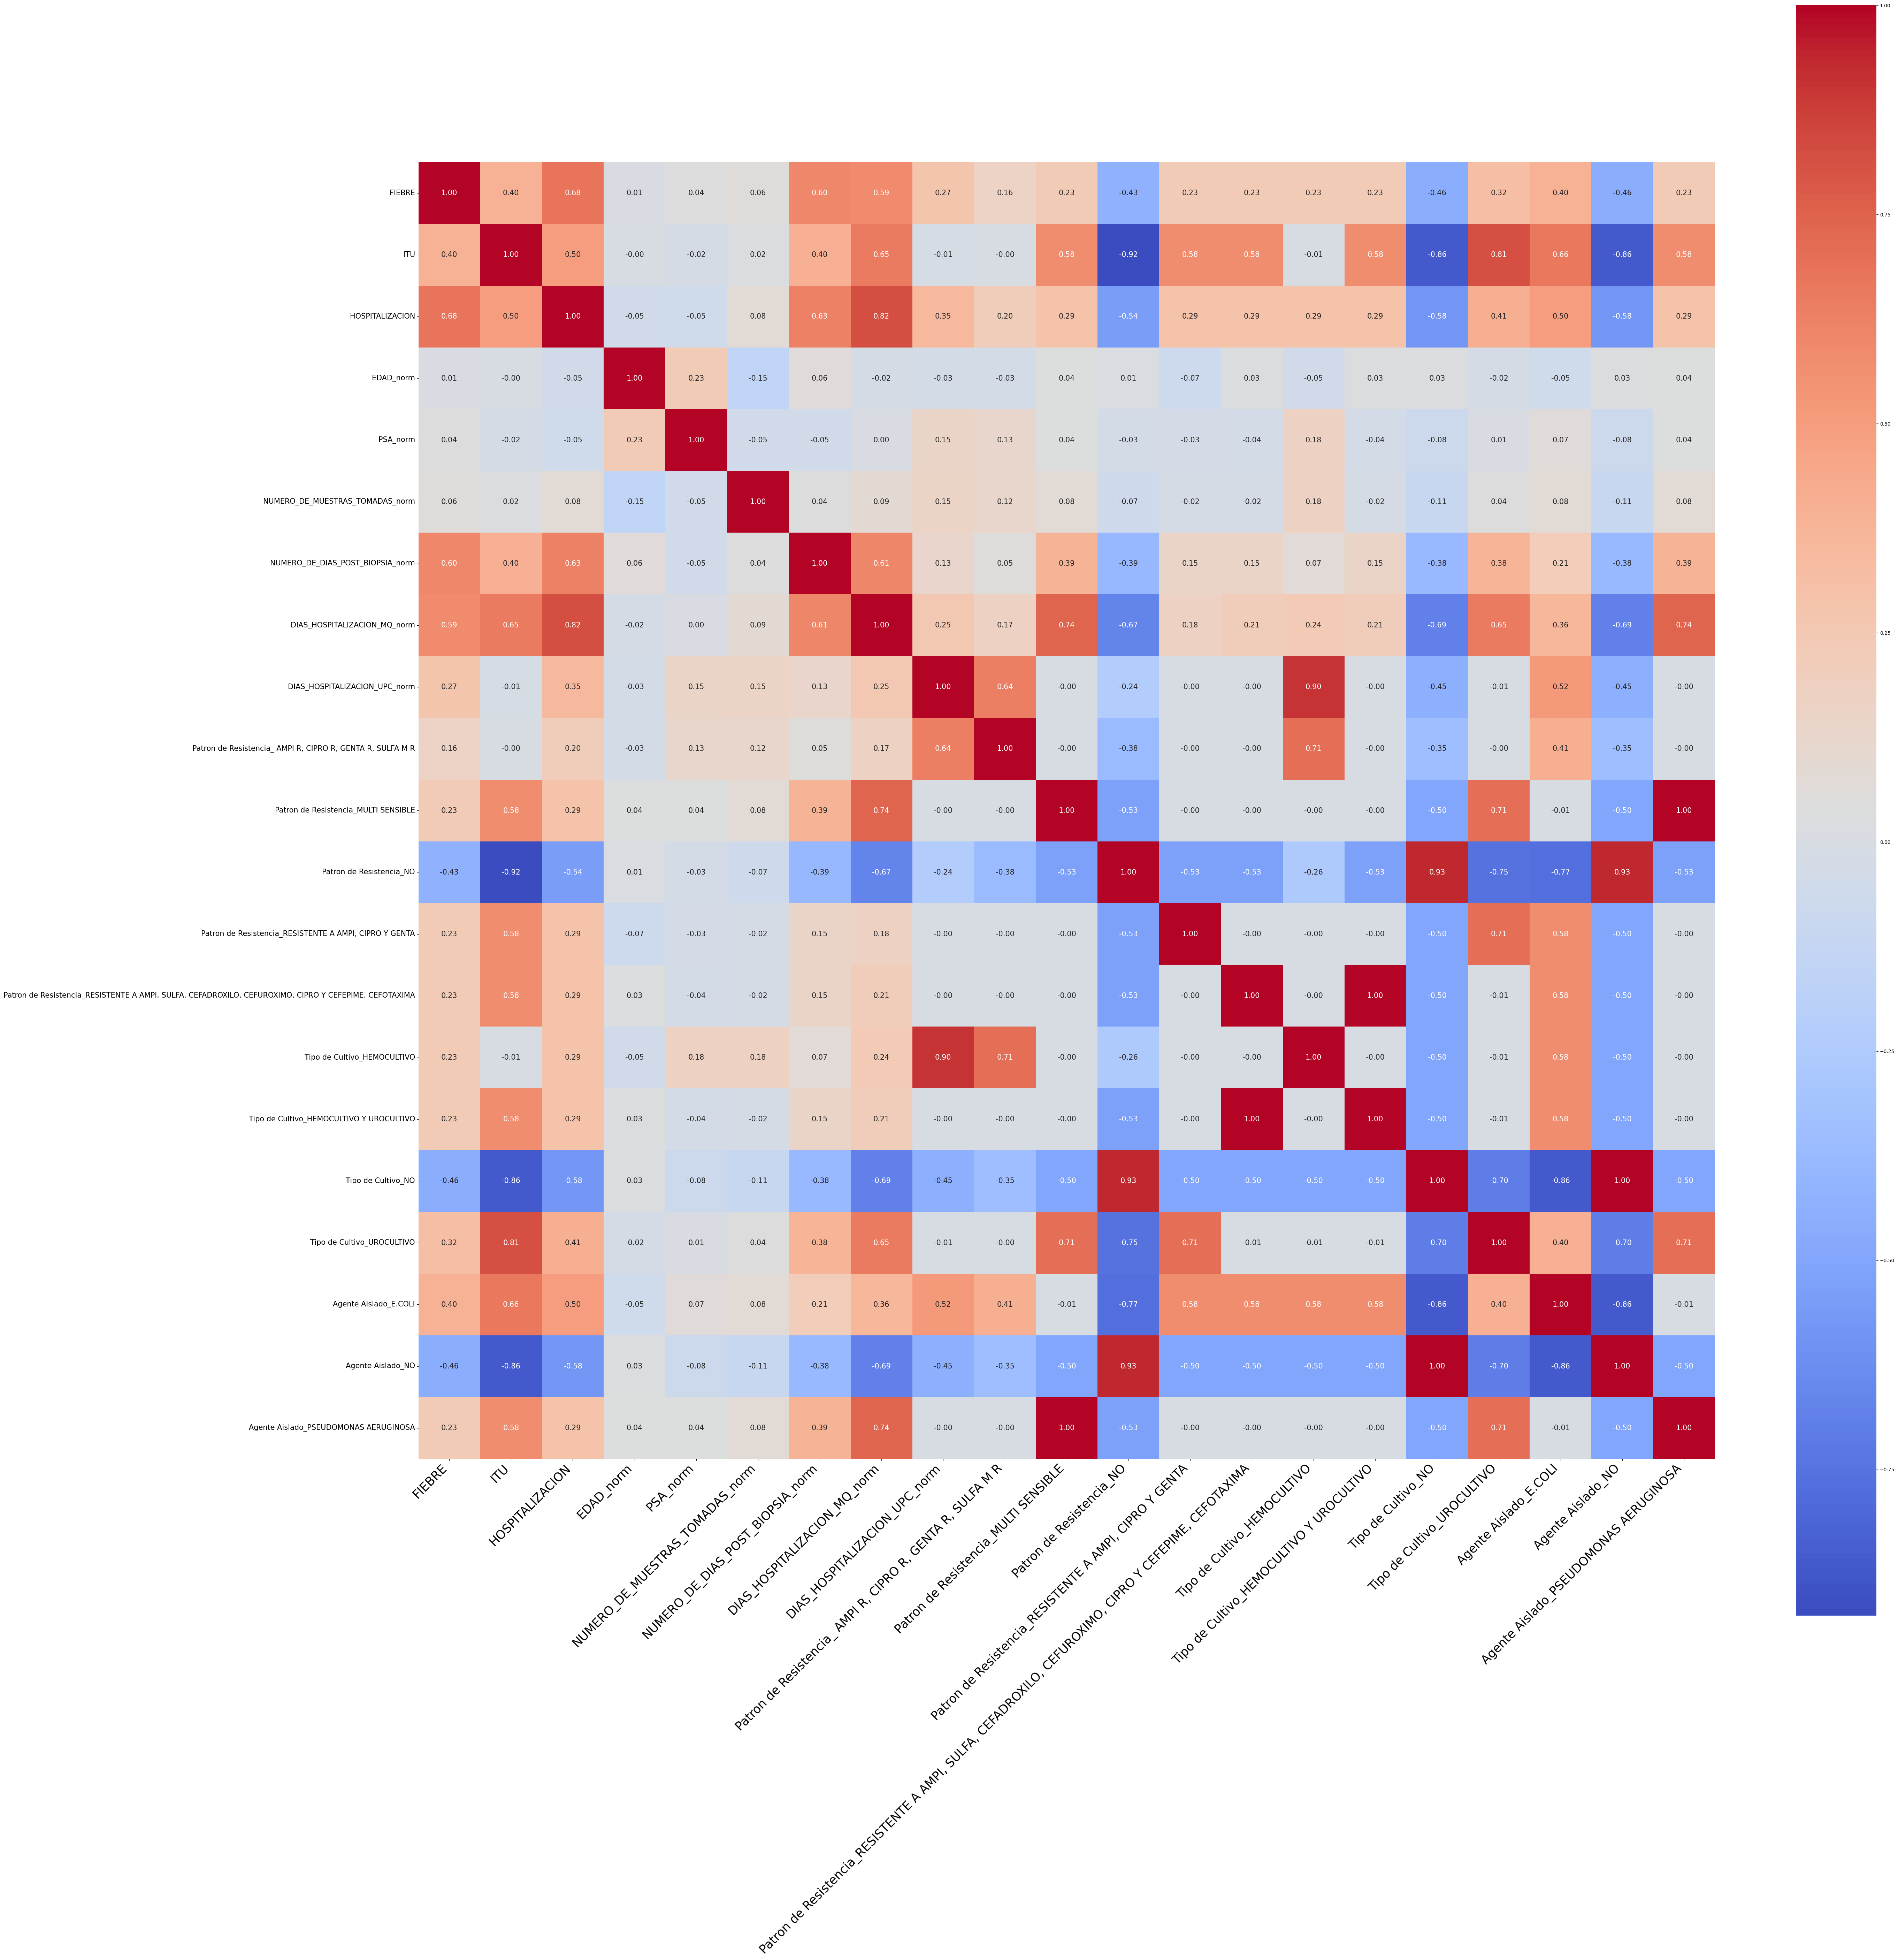

In [41]:
#La matriz es gigante y con muchas características que poco se correlacionan con la variable "HOSPITALIZACION" y entre ellas. Me quedo sólo con el cuadrado que va desde "FIEBRE"
#hasta "Agente Aislado_PSEUDOMONAS AERUGINOSA"

columnas_interes = ['FIEBRE', 'ITU', 'HOSPITALIZACION', 'EDAD_norm','PSA_norm','NUMERO_DE_MUESTRAS_TOMADAS_norm', 'NUMERO_DE_DIAS_POST_BIOPSIA_norm', 'DIAS_HOSPITALIZACION_MQ_norm',
'DIAS_HOSPITALIZACION_UPC_norm', 'Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R', 'Patron de Resistencia_MULTI SENSIBLE',
'Patron de Resistencia_NO','Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA','Patron de Resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
'Tipo de Cultivo_HEMOCULTIVO','Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO','Tipo de Cultivo_NO','Tipo de Cultivo_UROCULTIVO', 'Agente Aislado_E.COLI','Agente Aislado_NO',
'Agente Aislado_PSEUDOMONAS AERUGINOSA'] 

# Filtrar el DataFrame para incluir solo las columnas seleccionadas 
df_filtrado = df_norm[columnas_interes] 

# Calcular la matriz de correlación 
corr_matrix = df_filtrado.corr()

# Visualizar la matriz de correlación
fig = plt.figure(figsize= (60,60))
sns.heatmap(df_filtrado.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=25) # Ajustar el tamaño de las etiquetas del eje x
plt.yticks(rotation=0, fontsize=15) # Ajustar el tamaño de las etiquetas del eje y
plt.show()

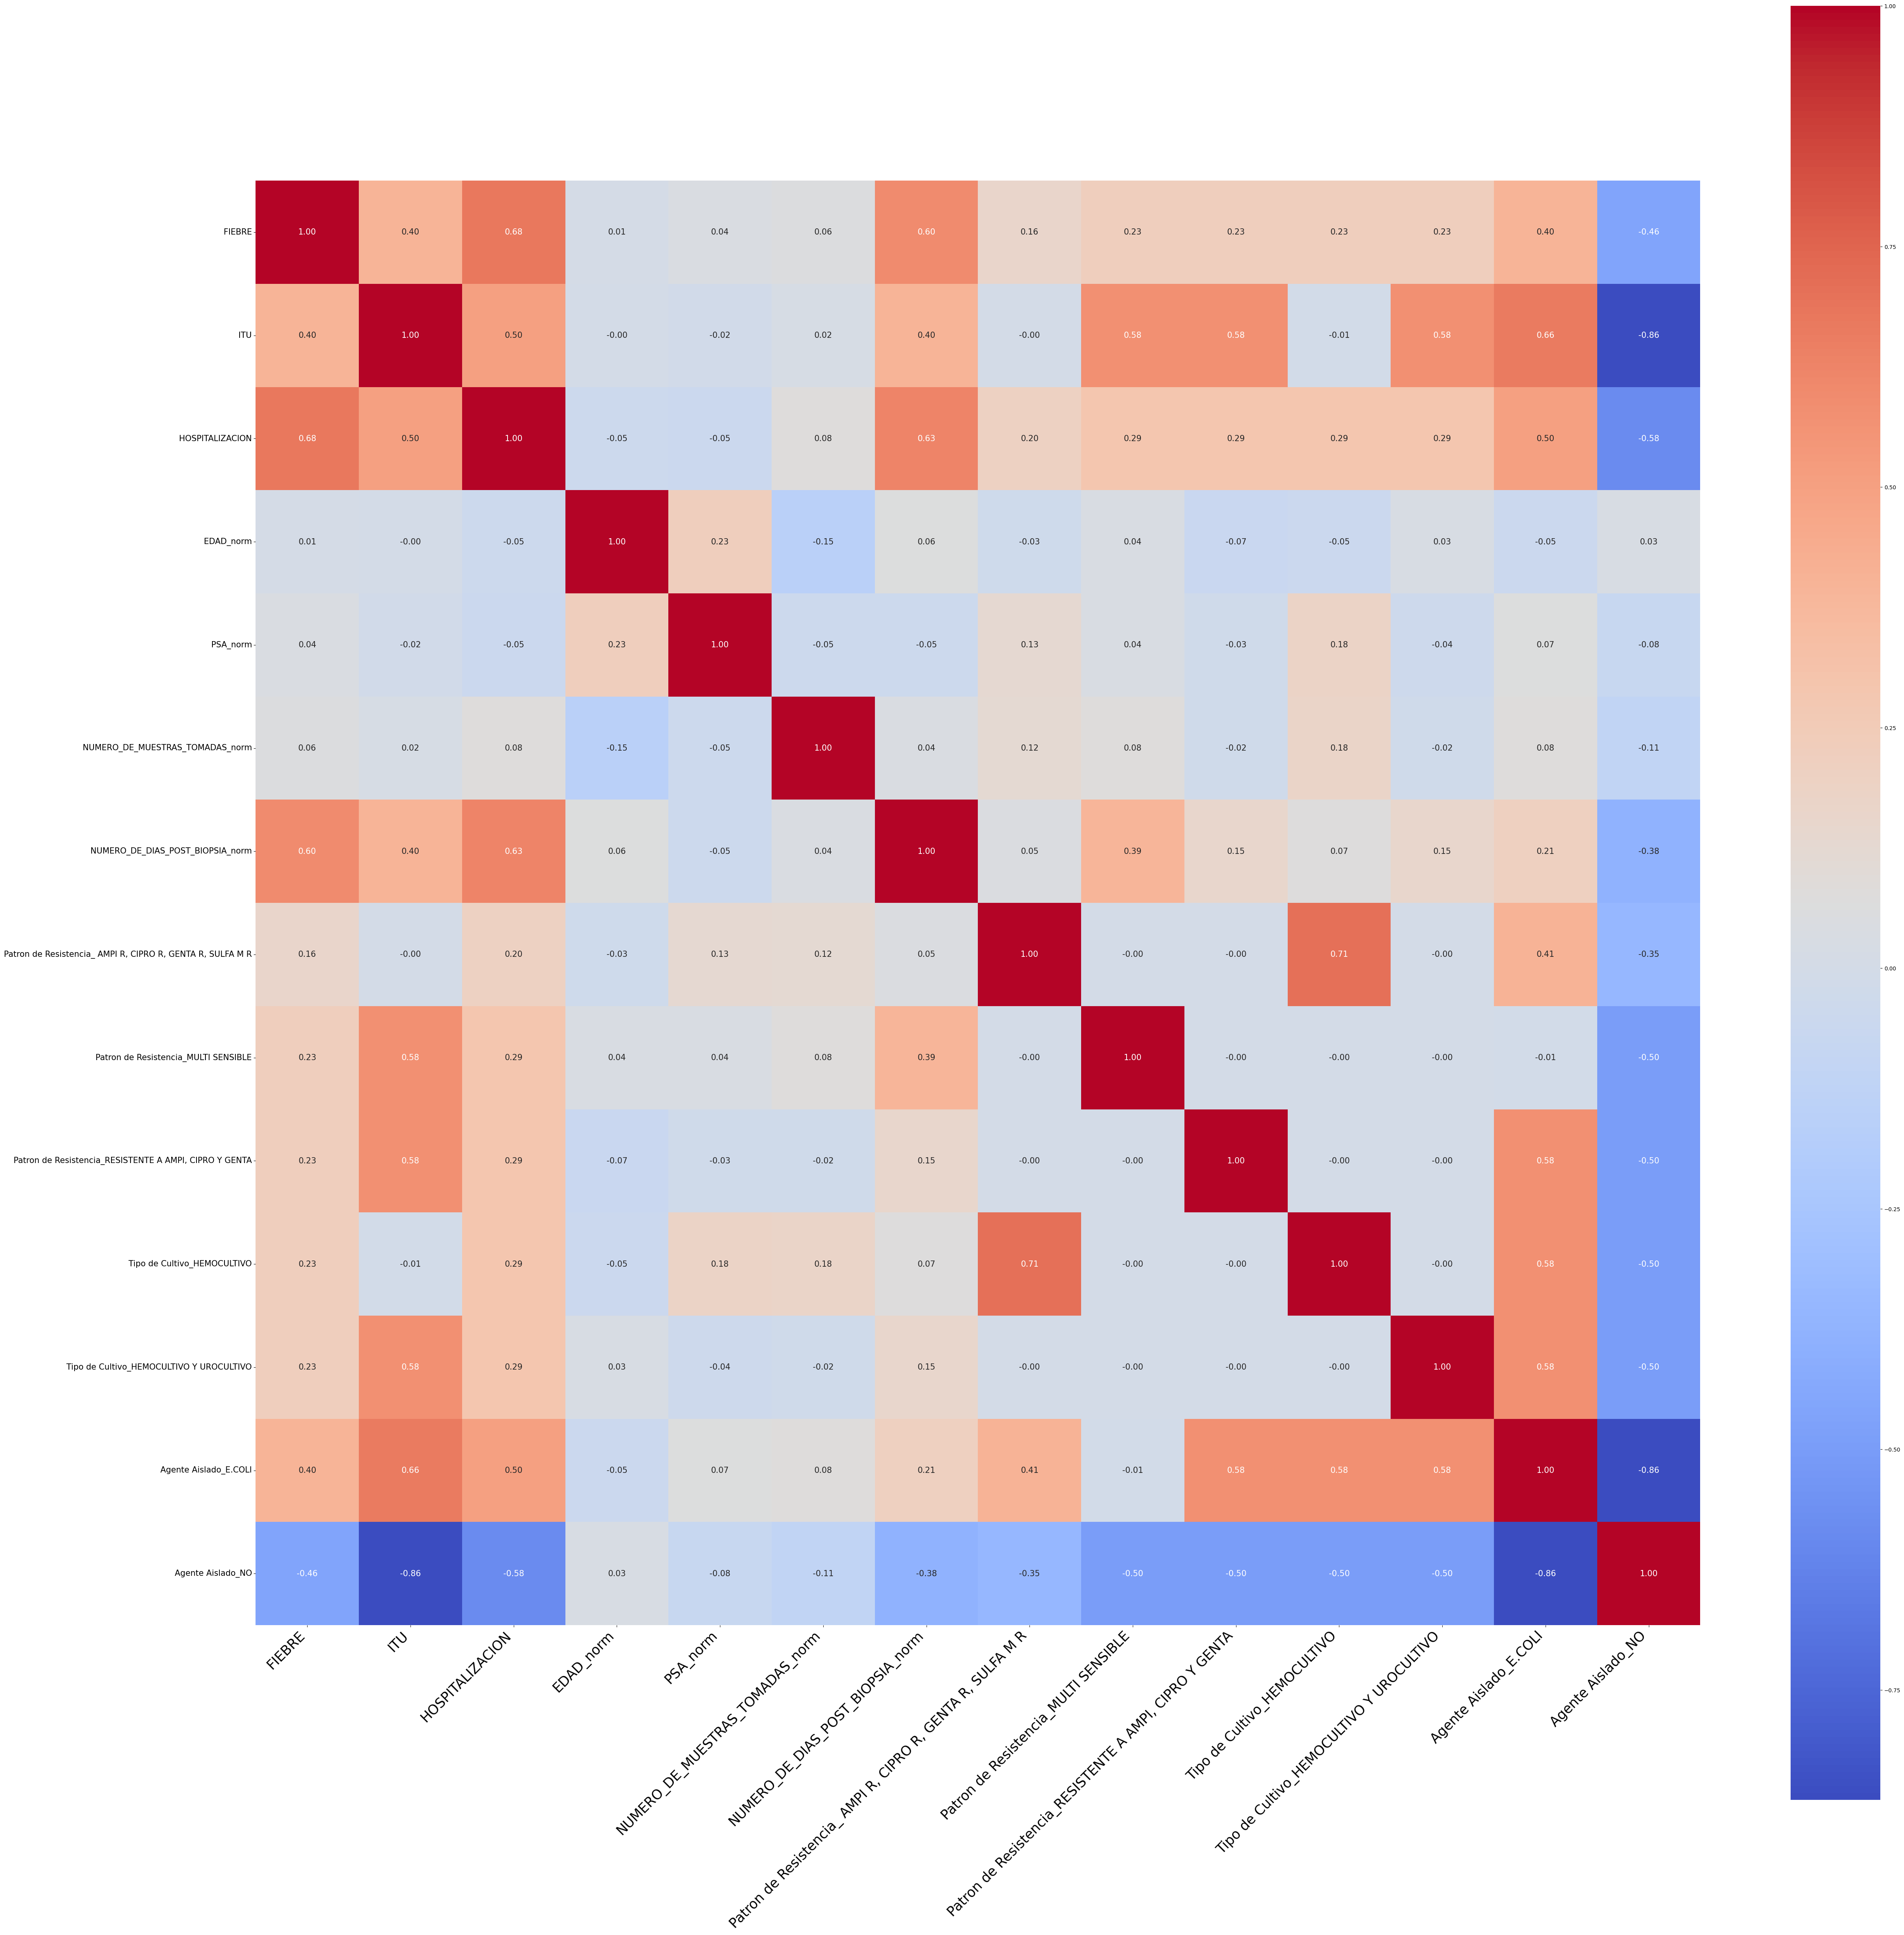

In [ ]:
#Filtro informacion redundante, quellas características con más de 0.8 de correlación positiva entre ellas. Las que estan entre '' fueron borradas.

#Patron resistencia multisensible > 'agente aislado... aeruginosa'
#'patron de resistencia no' y 'tipo de cultivo no' > agente aislado no
#tipo de cultivo hemocultivo > 'días hospitalización mq' y 'días hospitalización upc'
#tipo de cultivo hemocultivo y urocultivo > 'Patron de Resistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'
#'tipo urocultivo' > ITU

columnas_interes2 = ['FIEBRE', 'ITU', 'HOSPITALIZACION', 'EDAD_norm','PSA_norm','NUMERO_DE_MUESTRAS_TOMADAS_norm', 'NUMERO_DE_DIAS_POST_BIOPSIA_norm',
'Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R', 'Patron de Resistencia_MULTI SENSIBLE','Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA',
'Tipo de Cultivo_HEMOCULTIVO','Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO', 'Agente Aislado_E.COLI','Agente Aislado_NO'] 

# Filtrar el DataFrame para incluir solo las columnas seleccionadas 
df_filtrado2 = df_norm[columnas_interes2] 

# Calcular la matriz de correlación 
corr_matrix = df_filtrado2.corr()

# Visualizar la matriz de correlación
fig = plt.figure(figsize= (60,60))
sns.heatmap(df_filtrado2.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right', fontsize=25) # Ajustar el tamaño de las etiquetas del eje x
plt.yticks(rotation=0, fontsize=15) # Ajustar el tamaño de las etiquetas del eje y
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [ ]:
df_filtrado2.to_csv("BBDD_Hospitalizacion_listo_para_modelar.csv" , index=False)